In [1]:
import matplotlib.pyplot as plt
import os,sys
import numpy as np
from dadapy._utils.stochastic_minimization_hamming import *
sys.path.append('../')
from paths import *

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/home/sacevedo/my_env/lib64/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)


In [18]:
start = 1
L_list = np.arange(30,100+1,10,dtype=int)[start:]
N_list = L_list**2
Ns = 5000
Nsteps = int(1E6)
delta = 5E-4
alphamin = 0
alphamax = .1
histfolder = f'distances/results/hist/'

Tc_list = np.loadtxt(f'thermo/results/Tcs.txt')[start:]

ID_BID = np.zeros(shape=(len(L_list),))

for L_id,L in enumerate(L_list):
  ### BID
  T = 2.27#Tc_list[L_id]
  H = Hamming()
  H.D_histogram(
                T=T,
                L=L,
                Ns=Ns,
                resultsfolder=histfolder,
                )
  optfolder0 = f'BID/results/opt/L{L}/T{T:.2f}/'
  B = BID(H,
          alphamin=alphamin,
          alphamax=alphamax,
          seed=1,
          delta=delta,
          Nsteps=Nsteps,
          optfolder0=optfolder0,
          )
  (_,ID_BID[L_id],_,_,) = B.load_results()

In [ ]:
def fit_CD(c_init,c_end,values,cumulative,printing=False):
  p,cov = np.polyfit(np.log(values[c_init:c_end]),
                    np.log(cumulative[c_init:c_end]),
                    deg=1,
                    cov=True,
                    )
  if printing:  
    print(f'{p=}')
    print(f'{cov=}')
  return p,cov




In [77]:
start_fit = 3
p,cov = np.polyfit(np.log(L_list**2)[start_fit:],
                  np.log(ID_BID/L_list**2)[start_fit:],
                  deg=1,
                  cov=True,
                  )
print(f'{p=}')
# print(f'{cov=}')

p=array([-0.21, -0.65])


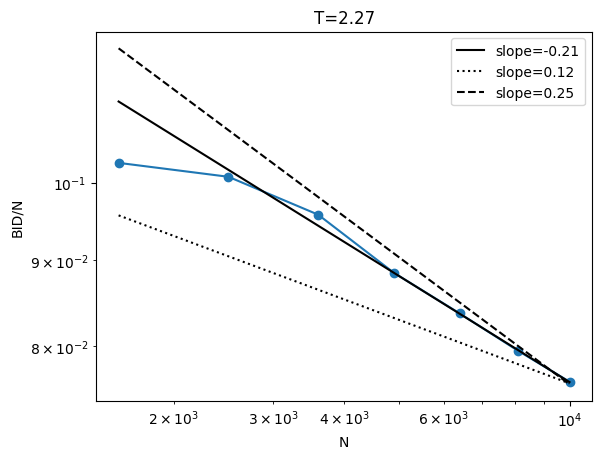

In [78]:

fix,ax = plt.subplots(1)

ax.plot(L_list**2,ID_BID/L_list**2,'o-')
ax.plot(L_list**2,L_list**(2*p[0])*np.exp(p[1]),color='black',label=f'slope={p[0]:.2f}')
ax.plot(L_list**2,L_list**(2*(-1/8))*np.exp(-1.425),color='black',label=f'slope={-1/8:.2f}',linestyle='dotted')
ax.plot(L_list**2,L_list**(2*(-1/4))*np.exp(-0.275),color='black',label=f'slope={-1/4:.2f}',linestyle='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.set_title(f'{T=:.2f}')
ax.set_ylabel(f'BID/N')
ax.set_xlabel(f'N')
plt.show()

In [27]:
1./8

0.125